In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
data=pd.read_csv('C:/Users/Asus/Downloads/assignment/crop.csv',delimiter=',')
data.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,16,Bangladesh,5312,Area harvested,27,"Rice, paddy",1961,1961,ha,8483516,NaN,Official data
1,QCL,Crops and livestock products,16,Bangladesh,5312,Area harvested,27,"Rice, paddy",1962,1962,ha,8694360,NaN,Official data
2,QCL,Crops and livestock products,16,Bangladesh,5312,Area harvested,27,"Rice, paddy",1963,1963,ha,9007995,NaN,Official data
3,QCL,Crops and livestock products,16,Bangladesh,5312,Area harvested,27,"Rice, paddy",1964,1964,ha,9228955,NaN,Official data
4,QCL,Crops and livestock products,16,Bangladesh,5312,Area harvested,27,"Rice, paddy",1965,1965,ha,9360480,NaN,Official data


In [3]:
data.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code (FAO)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [4]:
grouped = data.groupby(data.Element)
df_production = grouped.get_group("Production")
df_production = df_production.rename(columns={"Area":"Country","Value": "Production_tonnes"})
df_production = df_production[["Year","Country","Production_tonnes"]]
df_production

,Year,Country,Production_tonnes
120,1961,Bangladesh,14426184
121,1962,Bangladesh,13304520
122,1963,Bangladesh,15934944
123,1964,Bangladesh,15753588
124,1965,Bangladesh,15750540
...,...,...,...
1765,2016,Viet Nam,43112010
1766,2017,Viet Nam,42763682
1767,2018,Viet Nam,44046250
1768,2019,Viet Nam,43495488


In [5]:
d1=pd.read_csv('C:/Users/Asus/Downloads/assignment/fer1.csv',delimiter=',')
d1=d1[["Year","Area","Value"]]
d1.head()

,Year,Area,Value
0,1961,Bangladesh,20000.0
1,1962,Bangladesh,24000.0
2,1963,Bangladesh,36000.0
3,1964,Bangladesh,34000.0
4,1965,Bangladesh,42900.0


In [6]:
df_fer1 = d1.rename(columns={"Area":"Country","Value": "N_tonnes"})
df_fer1 = df_production.merge(df_fer1, on=['Year','Country'])
df_fer1

,Year,Country,Production_tonnes,N_tonnes
0,1961,Bangladesh,14426184,20000.00
1,1962,Bangladesh,13304520,24000.00
2,1963,Bangladesh,15934944,36000.00
3,1964,Bangladesh,15753588,34000.00
4,1965,Bangladesh,15750540,42900.00
...,...,...,...,...
568,2015,Viet Nam,45090562,1695781.41
569,2016,Viet Nam,43112010,1548920.79
570,2017,Viet Nam,42763682,1563255.78
571,2018,Viet Nam,44046250,1572827.28


In [7]:
d2=pd.read_csv('C:/Users/Asus/Downloads/assignment/fer2.csv',delimiter=',')
d2=d2[["Year","Area","Value"]]
d2.head()

,Year,Area,Value
0,1961,Bangladesh,2000.0
1,1962,Bangladesh,2000.0
2,1963,Bangladesh,11000.0
3,1964,Bangladesh,9000.0
4,1965,Bangladesh,9300.0


In [8]:
df_fer2 = d2.rename(columns={"Area":"Country","Value": "Phosphate_tonnes"})
df_fer2 = df_fer1.merge(df_fer2, on=['Year','Country'])
df_fer2

,Year,Country,Production_tonnes,N_tonnes,Phosphate_tonnes
0,1961,Bangladesh,14426184,20000.00,2000.00
1,1962,Bangladesh,13304520,24000.00,2000.00
2,1963,Bangladesh,15934944,36000.00,11000.00
3,1964,Bangladesh,15753588,34000.00,9000.00
4,1965,Bangladesh,15750540,42900.00,9300.00
...,...,...,...,...,...
547,2015,Viet Nam,45090562,1695781.41,755722.75
548,2016,Viet Nam,43112010,1548920.79,824152.16
549,2017,Viet Nam,42763682,1563255.78,873003.55
550,2018,Viet Nam,44046250,1572827.28,750301.85


In [9]:
d3=pd.read_csv('C:/Users/Asus/Downloads/assignment/fer3.csv',delimiter=',')
d3=d3[["Year","Area","Value"]]
d3.head()

,Year,Area,Value
0,1961,Bangladesh,500.0
1,1962,Bangladesh,1000.0
2,1963,Bangladesh,2000.0
3,1964,Bangladesh,2000.0
4,1965,Bangladesh,2000.0


In [10]:
df_fer3 = d3.rename(columns={"Area":"Country","Value": "Potash_tonnes"})
df_fer3 = df_fer2.merge(df_fer3, on=['Year','Country'])
df_fer3

,Year,Country,Production_tonnes,N_tonnes,Phosphate_tonnes,Potash_tonnes
0,1961,Bangladesh,14426184,20000.00,2000.00,500.00
1,1962,Bangladesh,13304520,24000.00,2000.00,1000.00
2,1963,Bangladesh,15934944,36000.00,11000.00,2000.00
3,1964,Bangladesh,15753588,34000.00,9000.00,2000.00
4,1965,Bangladesh,15750540,42900.00,9300.00,2000.00
...,...,...,...,...,...,...
535,2015,Viet Nam,45090562,1695781.41,755722.75,575621.43
536,2016,Viet Nam,43112010,1548920.79,824152.16,598959.74
537,2017,Viet Nam,42763682,1563255.78,873003.55,764285.52
538,2018,Viet Nam,44046250,1572827.28,750301.85,578928.28


In [11]:
grouped = data.groupby(data.Element)
df_area = grouped.get_group("Area harvested")
df_area = df_area.rename(columns={"Area":"Country","Value": "Area_ha"})
df_area = df_area[["Year","Country","Area_ha"]]
df_area = df_fer3.merge(df_area, on=['Year','Country'])
df_area

,Year,Country,Production_tonnes,N_tonnes,Phosphate_tonnes,Potash_tonnes,Area_ha
0,1961,Bangladesh,14426184,20000.00,2000.00,500.00,8483516
1,1962,Bangladesh,13304520,24000.00,2000.00,1000.00,8694360
2,1963,Bangladesh,15934944,36000.00,11000.00,2000.00,9007995
3,1964,Bangladesh,15753588,34000.00,9000.00,2000.00,9228955
4,1965,Bangladesh,15750540,42900.00,9300.00,2000.00,9360480
...,...,...,...,...,...,...,...
535,2015,Viet Nam,45090562,1695781.41,755722.75,575621.43,7828607
536,2016,Viet Nam,43112010,1548920.79,824152.16,598959.74,7734722
537,2017,Viet Nam,42763682,1563255.78,873003.55,764285.52,7708534
538,2018,Viet Nam,44046250,1572827.28,750301.85,578928.28,7570741


In [12]:
data3=pd.read_csv('C:/Users/Asus/Downloads/assignment/temp.csv',delimiter=',')
data3.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,16,Bangladesh,7271,Temperature change,7001,January,1961,1961,°C,0.929,Fc,Calculated data
1,ET,Temperature change,16,Bangladesh,7271,Temperature change,7001,January,1962,1962,°C,-1.174,Fc,Calculated data
2,ET,Temperature change,16,Bangladesh,7271,Temperature change,7001,January,1963,1963,°C,-0.320,Fc,Calculated data
3,ET,Temperature change,16,Bangladesh,7271,Temperature change,7001,January,1964,1964,°C,-0.272,Fc,Calculated data
4,ET,Temperature change,16,Bangladesh,7271,Temperature change,7001,January,1965,1965,°C,0.388,Fc,Calculated data


In [13]:
grouped = data3.groupby(data3.Months)
df_temp = grouped.get_group("Meteorological year")
df_temp = df_temp.rename(columns={"Area":"Country","Value": "Temp_Change"})
df_temp = df_temp[["Year","Country","Temp_Change"]]
df_temp = df_area.merge(df_temp, on=['Year','Country'])
df_temp

,Year,Country,Production_tonnes,N_tonnes,Phosphate_tonnes,Potash_tonnes,Area_ha,Temp_Change
0,1961,Bangladesh,14426184,20000.00,2000.00,500.00,8483516,0.155
1,1962,Bangladesh,13304520,24000.00,2000.00,1000.00,8694360,-0.258
2,1963,Bangladesh,15934944,36000.00,11000.00,2000.00,9007995,-0.082
3,1964,Bangladesh,15753588,34000.00,9000.00,2000.00,9228955,0.099
4,1965,Bangladesh,15750540,42900.00,9300.00,2000.00,9360480,-0.200
...,...,...,...,...,...,...,...,...
535,2015,Viet Nam,45090562,1695781.41,755722.75,575621.43,7828607,1.216
536,2016,Viet Nam,43112010,1548920.79,824152.16,598959.74,7734722,1.164
537,2017,Viet Nam,42763682,1563255.78,873003.55,764285.52,7708534,1.118
538,2018,Viet Nam,44046250,1572827.28,750301.85,578928.28,7570741,0.822


In [14]:
data4=pd.read_csv('C:/Users/Asus/Downloads/assignment/pest.csv',delimiter=',')
data4.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RP,Pesticides Use,50,Bangladesh,5157,Agricultural Use,1357,Pesticides (total),1990,1990,tonnes,1266,A,"Aggregate, may include official, semi-official..."
1,RP,Pesticides Use,50,Bangladesh,5157,Agricultural Use,1357,Pesticides (total),1991,1991,tonnes,1287,A,"Aggregate, may include official, semi-official..."
2,RP,Pesticides Use,50,Bangladesh,5157,Agricultural Use,1357,Pesticides (total),1992,1992,tonnes,1453,A,"Aggregate, may include official, semi-official..."
3,RP,Pesticides Use,50,Bangladesh,5157,Agricultural Use,1357,Pesticides (total),1993,1993,tonnes,1487,A,"Aggregate, may include official, semi-official..."
4,RP,Pesticides Use,50,Bangladesh,5157,Agricultural Use,1357,Pesticides (total),1994,1994,tonnes,1595,A,"Aggregate, may include official, semi-official..."


In [15]:
df_pest = data4.rename(columns={"Area":"Country","Value": "Pesticides_tonnes"})
df_pest = df_pest[["Year","Country","Pesticides_tonnes"]]
df_final = df_temp.merge(df_pest, on=['Year','Country'])
df_final

,Year,Country,Production_tonnes,N_tonnes,Phosphate_tonnes,Potash_tonnes,Area_ha,Temp_Change,Pesticides_tonnes
0,1990,Bangladesh,26777904,609163.00,236304.00,88155.00,10435340,-0.042,1266
1,1991,Bangladesh,27242000,705600.00,216600.00,82200.00,10244503,0.049,1287
2,1992,Bangladesh,27373000,713300.00,212018.00,73444.00,10178417,-0.047,1453
3,1993,Bangladesh,26928000,733562.00,149721.00,62300.00,9905600,-0.325,1487
4,1994,Bangladesh,25124000,803540.00,153420.00,92407.00,9919300,0.316,1595
...,...,...,...,...,...,...,...,...,...
283,2015,Viet Nam,45090562,1695781.41,755722.75,575621.43,7828607,1.216,19154
284,2016,Viet Nam,43112010,1548920.79,824152.16,598959.74,7734722,1.164,19154
285,2017,Viet Nam,42763682,1563255.78,873003.55,764285.52,7708534,1.118,19154
286,2018,Viet Nam,44046250,1572827.28,750301.85,578928.28,7570741,0.822,19154


In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               288 non-null    int64  
 1   Country            288 non-null    object 
 2   Production_tonnes  288 non-null    int64  
 3   N_tonnes           288 non-null    float64
 4   Phosphate_tonnes   288 non-null    float64
 5   Potash_tonnes      288 non-null    float64
 6   Area_ha            288 non-null    int64  
 7   Temp_Change        288 non-null    float64
 8   Pesticides_tonnes  288 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 22.5+ KB


In [18]:
bd = df_final[df_final.Country == 'Bangladesh']
bh = df_final[df_final.Country == 'Bhutan']
ch = df_final[df_final.Country == 'China']
ind = df_final[df_final.Country == 'India']
indo= df_final[df_final.Country == 'Indonesia']
my = df_final[df_final.Country == 'Myanmar']
pk = df_final[df_final.Country == 'Pakistan']
ph = df_final[df_final.Country == 'Philippines']
th = df_final[df_final.Country == 'Thailand']
vt = df_final[df_final.Country == 'Vietnam']

In [32]:
# bangladesh1=bd.Temp_Change/-bd.Temp_Change.iloc[0]
# bhutan1=bh.Temp_Change/bh.Temp_Change.iloc[0]
# china1 = ch.Temp_Change/ch.Temp_Change.iloc[0]
# india1 = ind.Temp_Change/-ind.Temp_Change.iloc[0]
# indonesia1 = indo.Temp_Change/indo.Temp_Change.iloc[0]
# myanmar1 = my.Temp_Change/my.Temp_Change.iloc[0]
# pakistan1 = pk.Temp_Change/pk.Temp_Change.iloc[0]
# philippines1 = ph.Temp_Change/ph.Temp_Change.iloc[0]
# thailand1 = th.Temp_Change/th.Temp_Change.iloc[0]
# vietnam1 = vt.Temp_Change/vt.Temp_Change.iloc[0]

In [34]:
bangladesh1=bd.Temp_Change
bhutan1=bh.Temp_Change
china1 = ch.Temp_Change
india1 = ind.Temp_Change
indonesia1 = indo.Temp_Change
myanmar1 = my.Temp_Change
pakistan1 = pk.Temp_Change
philippines1 = ph.Temp_Change
thailand1 = th.Temp_Change
vietnam1 = vt.Temp_Change

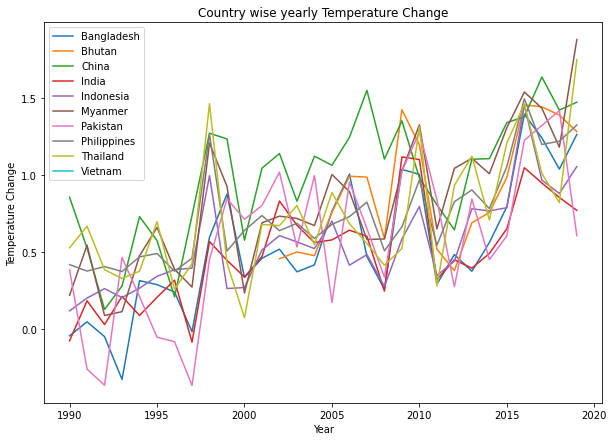

In [35]:
plt.figure(figsize=(10,7))

plt.plot(bd.Year,bangladesh1 )
plt.plot(bh.Year,bhutan1)
plt.plot(ch.Year,china1)
plt.plot(ind.Year,india1)
plt.plot(indo.Year,indonesia1)
plt.plot(my.Year,myanmar1)
plt.plot(pk.Year,pakistan1)
plt.plot(ph.Year,philippines1)
plt.plot(th.Year,thailand1)
plt.plot(vt.Year,vietnam1)

plt.legend(['Bangladesh','Bhutan','China','India','Indonesia',
           'Myanmer','Pakistan','Philippines','Thailand','Vietnam'])
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.title('Country wise yearly Temperature Change')
plt.show()

In [36]:
bangladesh=bd.Production_tonnes/bd.Production_tonnes.iloc[0]
bhutan=bh.Production_tonnes/bh.Production_tonnes.iloc[0]
china = ch.Production_tonnes/ch.Production_tonnes.iloc[0]
india = ind.Production_tonnes/ind.Production_tonnes.iloc[0]
indonesia = indo.Production_tonnes/indo.Production_tonnes.iloc[0]
myanmar = my.Production_tonnes/my.Production_tonnes.iloc[0]
pakistan = pk.Production_tonnes/pk.Production_tonnes.iloc[0]
philippines = ph.Production_tonnes/ph.Production_tonnes.iloc[0]
thailand = th.Production_tonnes/th.Production_tonnes.iloc[0]
vietnam = vt.Production_tonnes/vt.Production_tonnes.iloc[0]

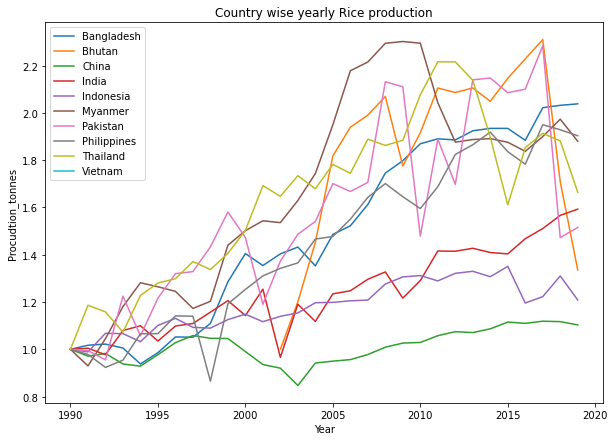

In [37]:
plt.figure(figsize=(10,7))

plt.plot(bd.Year,bangladesh )
plt.plot(bh.Year,bhutan)
plt.plot(ch.Year,china)
plt.plot(ind.Year,india)
plt.plot(indo.Year,indonesia)
plt.plot(my.Year,myanmar)
plt.plot(pk.Year,pakistan)
plt.plot(ph.Year,philippines)
plt.plot(th.Year,thailand)
plt.plot(vt.Year,vt)

plt.legend(['Bangladesh','Bhutan','China','India','Indonesia',
           'Myanmer','Pakistan','Philippines','Thailand','Vietnam'])
plt.xlabel('Year')
plt.ylabel('Procudtion_tonnes')
plt.title('Country wise yearly Rice production')
plt.show()

In [38]:
df_final["Year"]=df_final["Year"].astype(np.object)

C:\Users\Asus\AppData\Local\Temp/ipykernel_24816/3617273734.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_final["Year"]=df_final["Year"].astype(np.object)


In [39]:
df_final.describe()

,Production_tonnes,N_tonnes,Phosphate_tonnes,Potash_tonnes,Area_ha,Temp_Change,Pesticides_tonnes
count,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,288.000000,2.880000e+02
mean,5.568105e+07,4.994187e+06,1.905663e+06,1.052515e+06,1.320350e+07,0.693705,1.639308e+05
std,6.072168e+07,8.236813e+06,3.400339e+06,2.153601e+06,1.299356e+07,0.419844,4.456983e+05
min,3.739100e+04,6.860000e+02,1.719000e+02,1.228800e+02,1.227300e+04,-0.364000,1.000000e+00
25%,1.646905e+07,5.471948e+05,1.472818e+05,3.726075e+04,4.632361e+06,0.387000,1.597000e+03
50%,3.194000e+07,1.280910e+06,4.294500e+05,2.455000e+05,9.213440e+06,0.657500,1.689450e+04
75%,5.458751e+07,2.955001e+06,8.716895e+05,8.537020e+05,1.172855e+07,1.004250,3.115875e+04
max,2.144299e+08,3.113946e+07,1.439280e+07,1.184413e+07,4.553740e+07,1.879000,1.815690e+06


In [40]:
df_final.groupby(['Country'],sort=True)['Production_tonnes'].sum().nlargest(10)

Country
China          5828476893
India          4155643634
Indonesia      1603721539
Bangladesh     1204974883
Viet Nam       1035259195
Thailand        846373868
Myanmar         700271177
Philippines     428788069
Pakistan        231388842
Bhutan            1242876
Name: Production_tonnes, dtype: int64

In [41]:
df_final.corr()

,Production_tonnes,N_tonnes,Phosphate_tonnes,Potash_tonnes,Area_ha,Temp_Change,Pesticides_tonnes
Production_tonnes,1.000000,0.952338,0.934974,0.825648,0.891587,0.135656,0.779201
N_tonnes,0.952338,1.000000,0.991624,0.896969,0.776461,0.193339,0.886616
Phosphate_tonnes,0.934974,0.991624,1.000000,0.910776,0.755104,0.215973,0.891200
Potash_tonnes,0.825648,0.896969,0.910776,1.000000,0.595961,0.294256,0.897516
Area_ha,0.891587,0.776461,0.755104,0.595961,1.000000,-0.026414,0.458935
Temp_Change,0.135656,0.193339,0.215973,0.294256,-0.026414,1.000000,0.276780
Pesticides_tonnes,0.779201,0.886616,0.891200,0.897516,0.458935,0.276780,1.000000


C:\Users\Asus\AppData\Local\Temp/ipykernel_24816/1203324092.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_data, dtype=np.bool)


<AxesSubplot:>

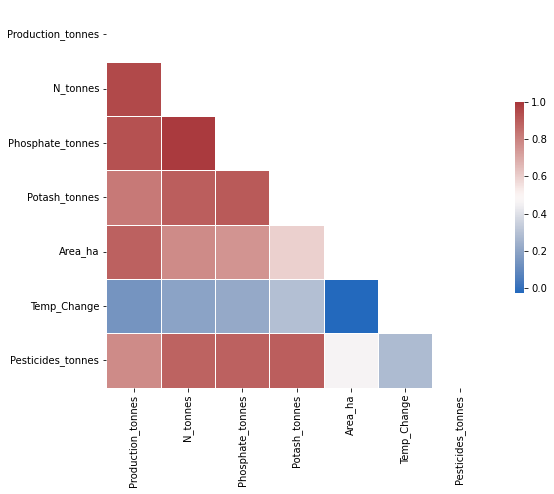

In [43]:
correlation_data=df_final.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 7))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=1.0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

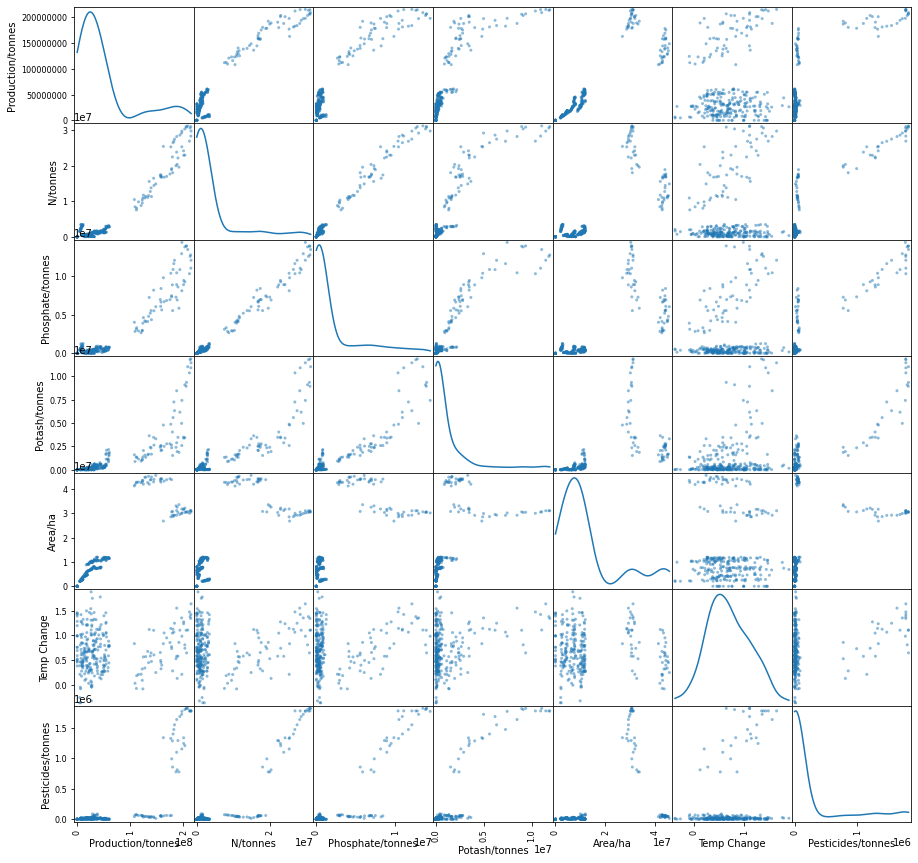

In [38]:
pd.plotting.scatter_matrix(df_final, alpha=0.5, figsize=(15, 15), diagonal='kde')
plt.show()

In [54]:
Y = df_final['Production_tonnes']
X = df_final[['Area_ha','Temp_Change','Pesticides_tonnes','N_tonnes','Phosphate_tonnes','Potash_tonnes']]
clf = LinearRegression(fit_intercept=True).fit(X, Y)
clf.coef_

array([ 2.57770245e+00,  3.85620504e+06,  3.95133186e+01,  4.27589005e+00,
       -5.80768658e+00,  1.32996026e-01])

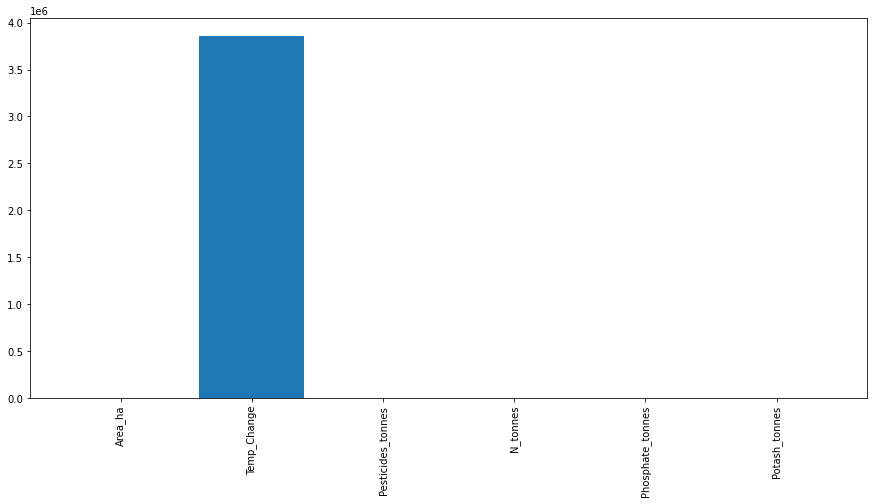

In [58]:
labels = ['Area_ha','Temp_Change','Pesticides_tonnes','N_tonnes','Phosphate_tonnes','Potash_tonnes']
x_ = np.arange(len(labels))

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.bar(x_, clf.coef_)
ax.set_xticks(x_)
ax.set_xticklabels(labels, rotation=90)
plt.show();

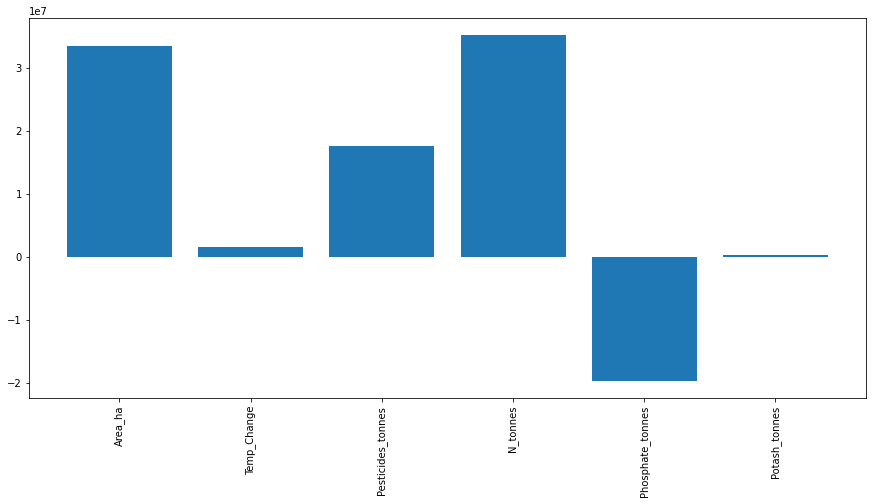

In [59]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
predictors_scaled = scaler.transform(X)

clf_scaled = LinearRegression(fit_intercept=True).fit(predictors_scaled, Y)
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.bar(x_, clf_scaled.coef_)
ax.set_xticks(x_)
ax.set_xticklabels(labels, rotation=90)
plt.show();

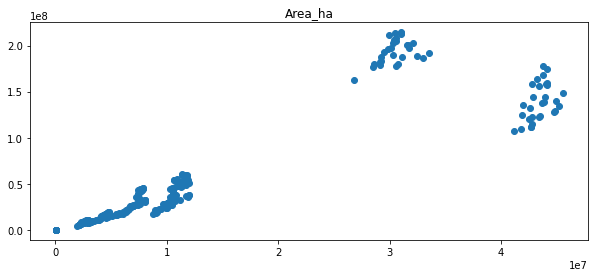

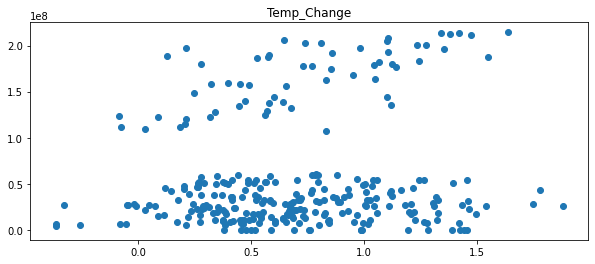

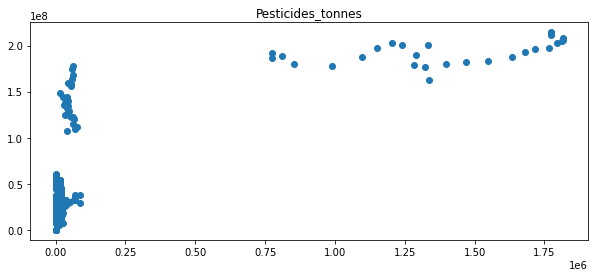

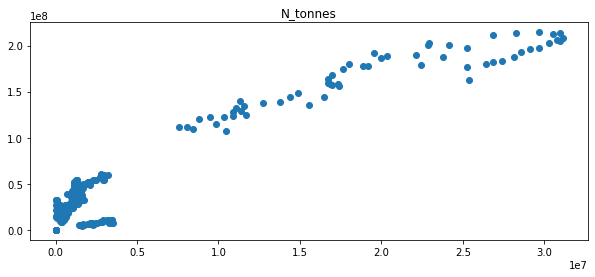

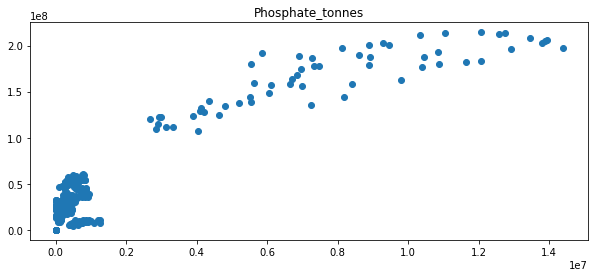

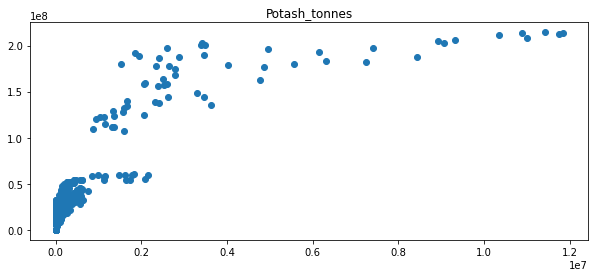

In [60]:
for l in labels:
    plt.figure(figsize=(10, 4))
    plt.scatter(df_final[l].values, df_final["Production_tonnes"].values)
    plt.title(l)
    plt.show();

In [63]:
y = df_final['Production_tonnes']
x = df_final[['Area_ha','Temp_Change','Pesticides_tonnes','N_tonnes','Phosphate_tonnes','Potash_tonnes']]
xx = sm.add_constant(x)
model1 = sm.OLS(y, xx).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Production_tonnes   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1727.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.71e-218
Time:                        09:23:42   Log-Likelihood:                -5046.3
No. Observations:                 288   AIC:                         1.011e+04
Df Residuals:                     281   BIC:                         1.013e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.067e+06   1.47e+0

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


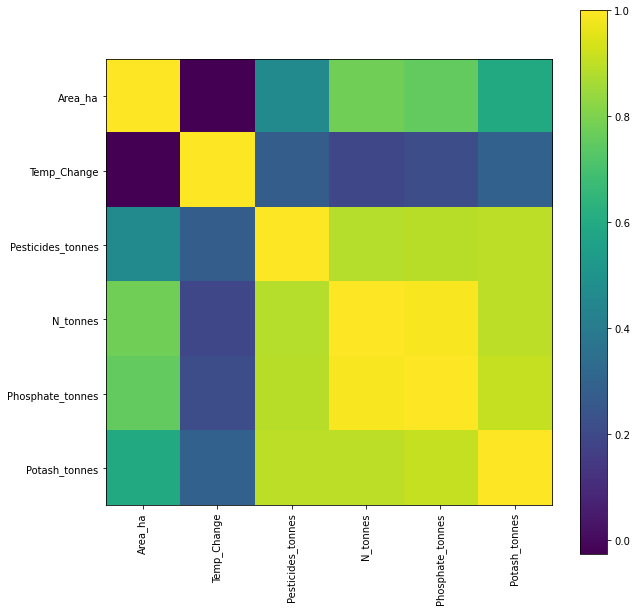

In [64]:
labels = ['Area_ha','Temp_Change','Pesticides_tonnes','N_tonnes','Phosphate_tonnes','Potash_tonnes']
x_ = range(len(labels))
cor = df_final[labels].corr()

fig, ax = plt.subplots(1,1, figsize=(10, 10))
im = ax.imshow(cor)
ax.set_xticks(x_)
ax.set_yticks(x_)
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)

plt.colorbar(im, ax=ax)
plt.show()

In [65]:
print(cor)

                    Area_ha  Temp_Change  Pesticides_tonnes  N_tonnes  \
Area_ha            1.000000    -0.026414           0.458935  0.776461   
Temp_Change       -0.026414     1.000000           0.276780  0.193339   
Pesticides_tonnes  0.458935     0.276780           1.000000  0.886616   
N_tonnes           0.776461     0.193339           0.886616  1.000000   
Phosphate_tonnes   0.755104     0.215973           0.891200  0.991624   
Potash_tonnes      0.595961     0.294256           0.897516  0.896969   

                   Phosphate_tonnes  Potash_tonnes  
Area_ha                    0.755104       0.595961  
Temp_Change                0.215973       0.294256  
Pesticides_tonnes          0.891200       0.897516  
N_tonnes                   0.991624       0.896969  
Phosphate_tonnes           1.000000       0.910776  
Potash_tonnes              0.910776       1.000000  


In [69]:
nx = sm.add_constant(predictors_scaled)
model2 = sm.OLS(Y,nx).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      Production_tonnes   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1727.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.71e-218
Time:                        09:38:16   Log-Likelihood:                -5046.3
No. Observations:                 288   AIC:                         1.011e+04
Df Residuals:                     281   BIC:                         1.013e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.568e+07   5.88e+05     94.756      0.0

In [68]:
model3 = sm.OLS(Y,predictors_scaled).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:      Production_tonnes   R-squared (uncentered):                   0.528
Model:                            OLS   Adj. R-squared (uncentered):              0.518
Method:                 Least Squares   F-statistic:                              52.58
Date:                Mon, 07 Feb 2022   Prob (F-statistic):                    3.01e-43
Time:                        09:30:37   Log-Likelihood:                         -5549.6
No. Observations:                 288   AIC:                                  1.111e+04
Df Residuals:                     282   BIC:                                  1.113e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
new = df_final[['Area_ha','Temp_Change','Pesticides_tonnes','N_tonnes','Phosphate_tonnes']]
scaler = preprocessing.StandardScaler().fit(new)
pred_scaled = scaler.transform(new)
nxx = sm.add_constant(pred_scaled)
model4 = sm.OLS(Y,nxx).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:      Production_tonnes   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2079.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          3.63e-220
Time:                        10:09:23   Log-Likelihood:                -5046.3
No. Observations:                 288   AIC:                         1.010e+04
Df Residuals:                     282   BIC:                         1.013e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.568e+07   5.87e+05     94.919      0.0